In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv', names = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of Glass'])

In [12]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [13]:
df.shape

(214, 10)

In [14]:
df.dtypes

RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of Glass      int64
dtype: object

In [15]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of Glass    0
dtype: int64

In [16]:
df.nunique()

RI               178
Na               142
Mg                94
Al               118
Si               133
K                 65
Ca               143
Ba                34
Fe                32
Type of Glass      6
dtype: int64

In [17]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


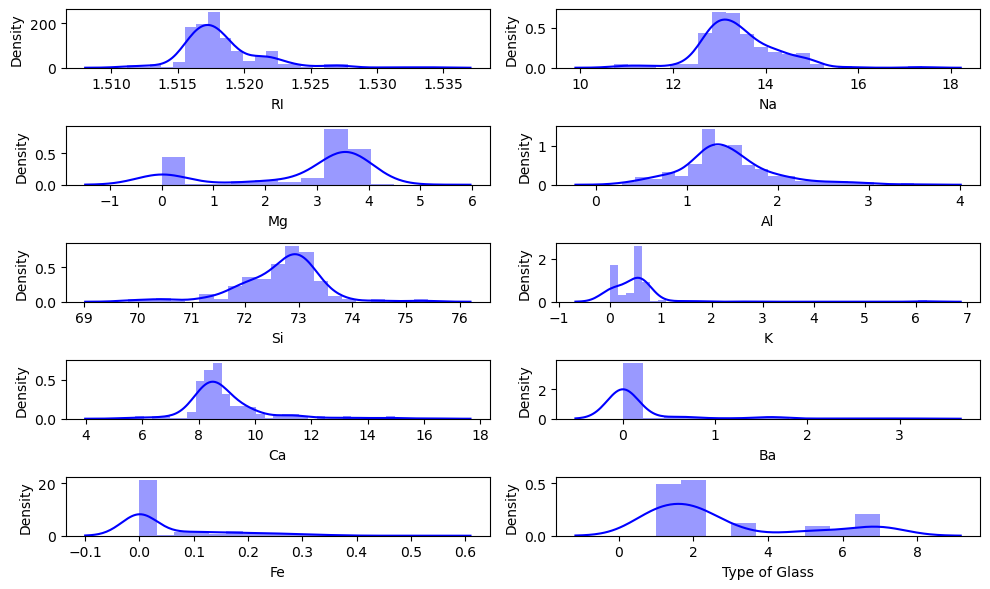

In [18]:
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for c in df.columns:
    if plotnumber <= 10:
        x=plt.subplot(5,2,plotnumber)
        sns.distplot(df[c],color = "b")
        plt.xlabel(c, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [19]:
df.skew()

RI               1.625431
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Ba               3.416425
Fe               1.754327
Type of Glass    1.114915
dtype: float64

In [22]:
df['RI']=np.cbrt(df['RI'])
df['K']=np.cbrt(df['K'])
df['Ca']=np.cbrt(df['Ca'])
df['Ba']=np.cbrt(df['Ba'])
df['Fe']=np.cbrt(df['Fe'])

In [23]:
df.skew()

RI               1.617049
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K               -0.591896
Ca               1.407358
Ba               2.073007
Fe               0.894683
Type of Glass    1.114915
dtype: float64

In [28]:
df['RI']=np.cbrt(df['RI'])
df['Ca']=np.cbrt(df['Ca'])
df['Ba']=np.cbrt(df['Ba'])

In [29]:
df.skew()

RI               1.613020
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K               -0.591896
Ca               1.079294
Ba               1.700186
Fe               0.894683
Type of Glass    1.114915
dtype: float64

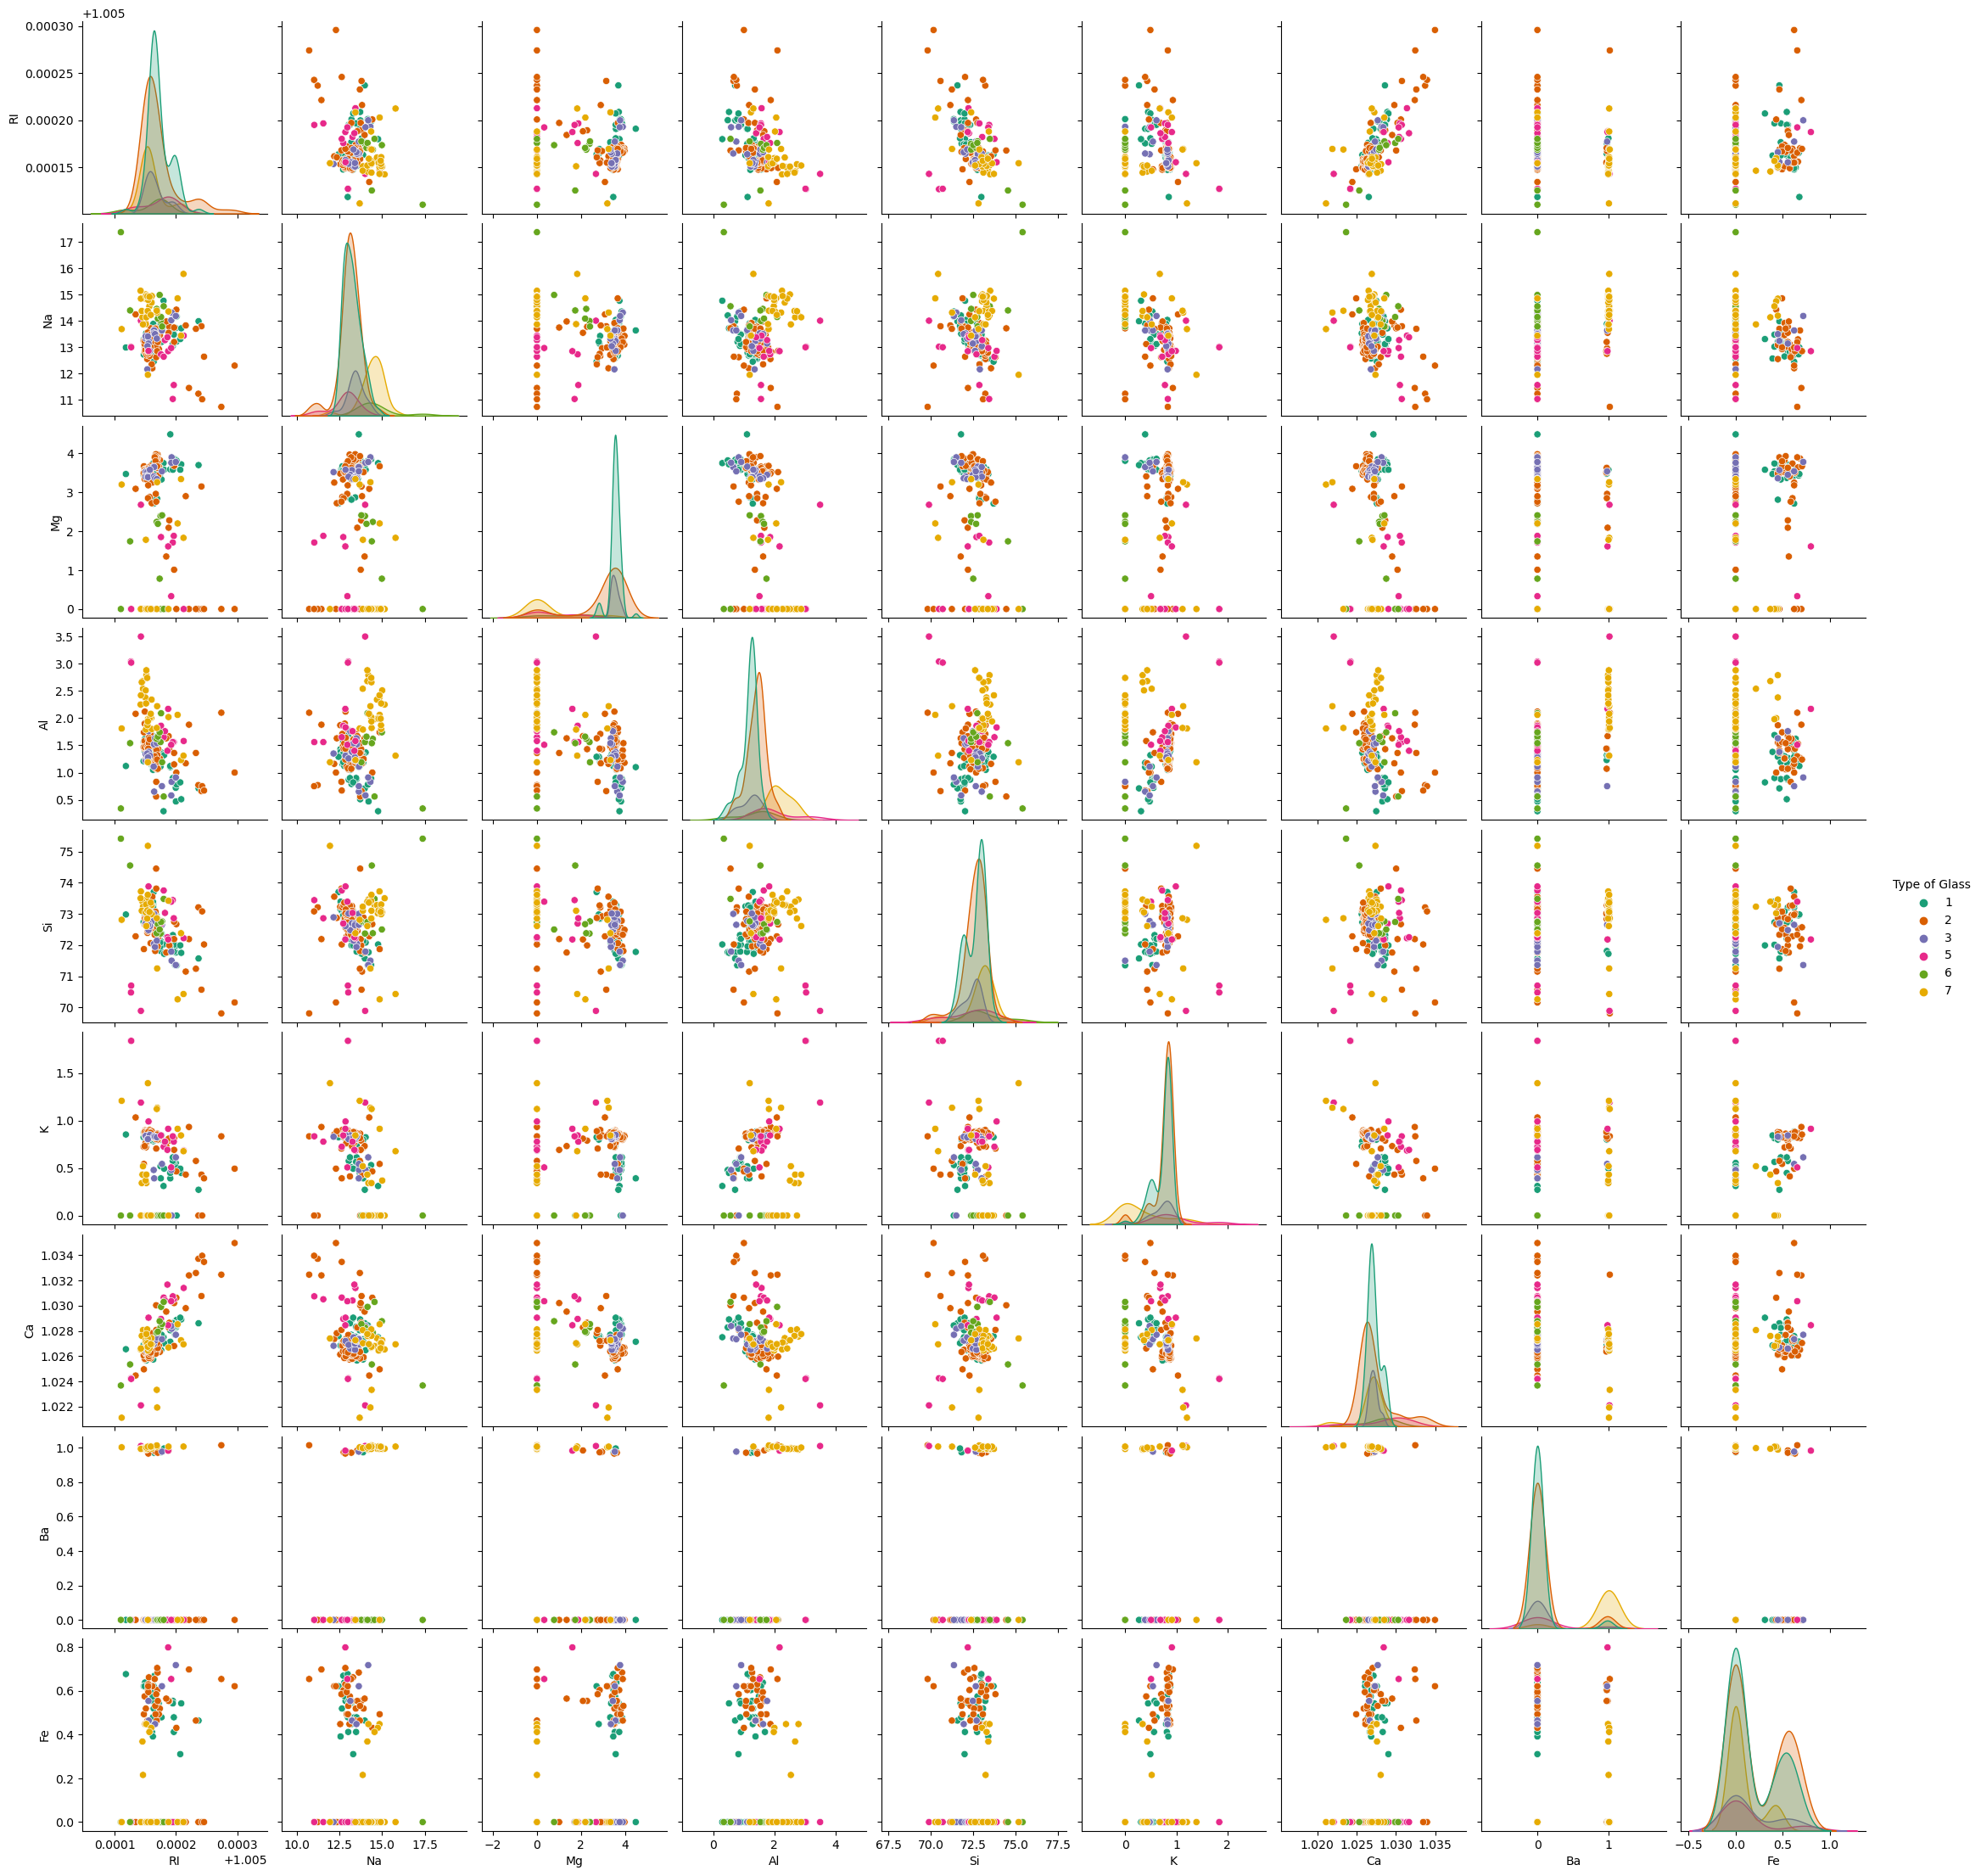

In [31]:
sns.pairplot(df, hue='Type of Glass', palette="Dark2")
plt.show()

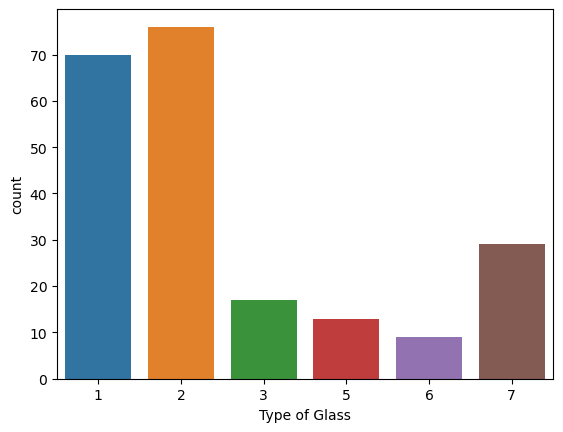

In [33]:
sns.countplot(x='Type of Glass', data=df)
plt.show()

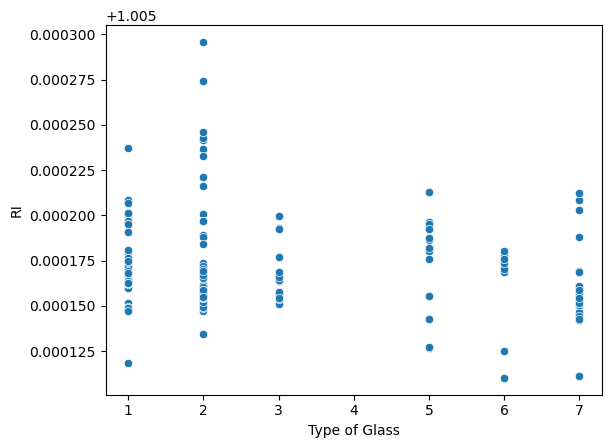

In [36]:
sns.scatterplot(y='RI', x='Type of Glass', data=df)
plt.show()

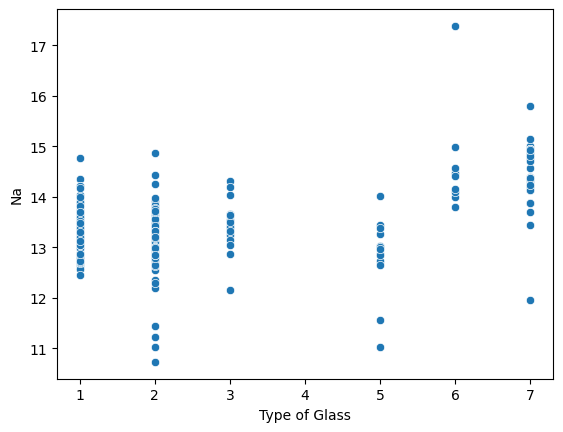

In [37]:
sns.scatterplot(x='Type of Glass', y='Na', data=df)
plt.show()

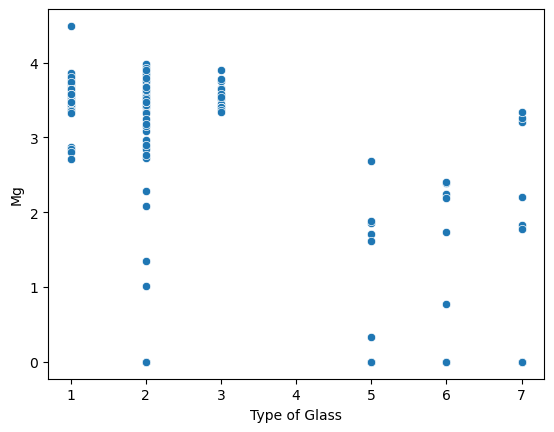

In [41]:
sns.scatterplot(x='Type of Glass', y='Mg', data=df)
plt.show()

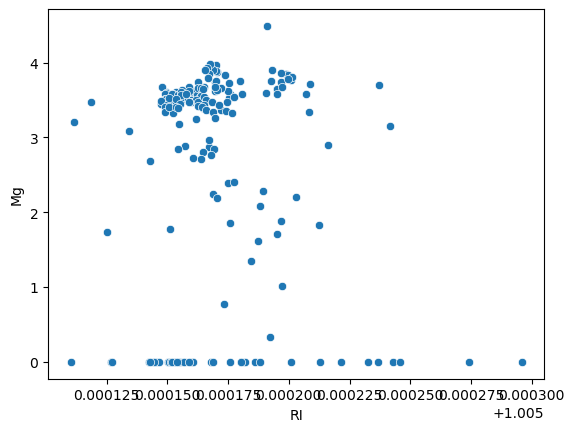

In [42]:
sns.scatterplot(x='RI', y='Mg', data=df)
plt.show()

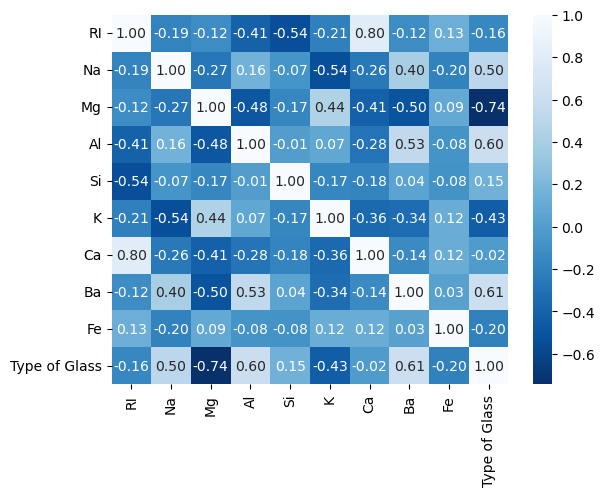

In [43]:
corr = df.corr()
sns.heatmap(corr,annot=True,fmt='0.2f',cmap='Blues_r')
plt.show()

In [44]:
corr['Type of Glass'].sort_values(ascending = False)

Type of Glass    1.000000
Ba               0.612301
Al               0.598829
Na               0.502898
Si               0.151565
Ca              -0.015965
RI              -0.164511
Fe              -0.204767
K               -0.433255
Mg              -0.744993
Name: Type of Glass, dtype: float64

In [45]:
df = df.drop('Ca', axis = 1) #dosent effect the result much

In [46]:
x = df.drop('Type of Glass', axis =1)
y = df['Type of Glass']

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,RI,Na,Mg,Al,Si,K,Ba,Fe
0,0.874481,0.284953,1.254639,-0.692442,-1.127082,-0.835901,-0.464613,-0.679381
1,-0.248804,0.591817,0.636168,-0.170460,0.102319,0.346205,-0.464613,-0.679381
2,-0.721987,0.149933,0.601422,0.190912,0.438787,0.188105,-0.464613,-0.679381
3,-0.232267,-0.242853,0.698710,-0.310994,-0.052974,0.485589,-0.464613,-0.679381
4,-0.311649,-0.169205,0.650066,-0.411375,0.555256,0.455958,-0.464613,-0.679381
...,...,...,...,...,...,...,...,...
209,-0.705435,0.898681,-1.865511,2.881125,-0.052974,-0.716931,2.167664,-0.679381
210,-0.500231,1.856097,-1.865511,1.094342,0.529374,-2.018006,2.180873,-0.679381
211,0.755663,1.168721,-1.865511,1.154570,0.995252,-2.018006,2.181885,-0.679381
212,-0.612752,1.193270,-1.865511,0.993960,1.241133,-2.018006,2.180460,-0.679381


In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,6.052871,RI
1,3.049920,Na
2,3.299987,Mg
3,3.955008,Al
4,4.182120,Si
5,2.780635,K
6,1.898924,Ba
7,1.090558,Fe


In [49]:
y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of Glass, dtype: int64

In [51]:
y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of Glass, dtype: int64

In [52]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [53]:
y1.value_counts()

1    76
2    76
3    76
5    76
6    76
7    76
Name: Type of Glass, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print(maxAccu," at ",maxRS)

0.9562043795620438  at  103


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = maxRS)

In [56]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [57]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
prfc = RFC.predict(x_test)
print(accuracy_score(y_test,prfc))
print(confusion_matrix(y_test,prfc))
print(classification_report(y_test,prfc))

0.948905109489051
[[18  0  1  0  0  0]
 [ 1 16  1  2  0  0]
 [ 1  0 24  0  0  0]
 [ 0  0  0 24  0  0]
 [ 0  0  0  0 28  0]
 [ 0  0  0  1  0 20]]
              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       1.00      0.80      0.89        20
           3       0.92      0.96      0.94        25
           5       0.89      1.00      0.94        24
           6       1.00      1.00      1.00        28
           7       1.00      0.95      0.98        21

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.94       137
weighted avg       0.95      0.95      0.95       137



In [58]:
svc = SVC()
svc.fit(x_train,y_train)
psvc = svc.predict(x_test)
print(accuracy_score(y_test,psvc))
print(confusion_matrix(y_test,psvc))
print(classification_report(y_test,psvc))

0.8394160583941606
[[14  2  3  0  0  0]
 [ 4 10  5  1  0  0]
 [ 6  0 19  0  0  0]
 [ 0  0  0 24  0  0]
 [ 0  0  0  0 28  0]
 [ 0  1  0  0  0 20]]
              precision    recall  f1-score   support

           1       0.58      0.74      0.65        19
           2       0.77      0.50      0.61        20
           3       0.70      0.76      0.73        25
           5       0.96      1.00      0.98        24
           6       1.00      1.00      1.00        28
           7       1.00      0.95      0.98        21

    accuracy                           0.84       137
   macro avg       0.84      0.82      0.82       137
weighted avg       0.85      0.84      0.84       137



In [59]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
pgb = GB.predict(x_test)
print(accuracy_score(y_test,pgb))
print(confusion_matrix(y_test,pgb))
print(classification_report(y_test,pgb))

0.9197080291970803
[[13  4  2  0  0  0]
 [ 1 18  0  1  0  0]
 [ 1  1 23  0  0  0]
 [ 0  0  0 24  0  0]
 [ 0  0  0  0 28  0]
 [ 0  0  0  1  0 20]]
              precision    recall  f1-score   support

           1       0.87      0.68      0.76        19
           2       0.78      0.90      0.84        20
           3       0.92      0.92      0.92        25
           5       0.92      1.00      0.96        24
           6       1.00      1.00      1.00        28
           7       1.00      0.95      0.98        21

    accuracy                           0.92       137
   macro avg       0.92      0.91      0.91       137
weighted avg       0.92      0.92      0.92       137



In [60]:
AB = AdaBoostClassifier()
AB.fit(x_train,y_train)
pab = AB.predict(x_test)
print(accuracy_score(y_test,pab))
print(confusion_matrix(y_test,pab))
print(classification_report(y_test,pab))

0.30656934306569344
[[19  0  0  0  0  0]
 [17  2  0  0  0  1]
 [25  0  0  0  0  0]
 [ 0 17  0  7  0  0]
 [ 0 28  0  0  0  0]
 [ 0  1  0  6  0 14]]
              precision    recall  f1-score   support

           1       0.31      1.00      0.47        19
           2       0.04      0.10      0.06        20
           3       0.00      0.00      0.00        25
           5       0.54      0.29      0.38        24
           6       0.00      0.00      0.00        28
           7       0.93      0.67      0.78        21

    accuracy                           0.31       137
   macro avg       0.30      0.34      0.28       137
weighted avg       0.29      0.31      0.26       137



In [61]:
B = BaggingClassifier()
B.fit(x_train,y_train)
pb = B.predict(x_test)
print(accuracy_score(y_test,pb))
print(confusion_matrix(y_test,pb))
print(classification_report(y_test,pb))

0.8686131386861314
[[12  4  2  0  0  1]
 [ 1 16  1  2  0  0]
 [ 3  2 20  0  0  0]
 [ 0  0  0 24  0  0]
 [ 0  0  0  0 28  0]
 [ 0  1  0  1  0 19]]
              precision    recall  f1-score   support

           1       0.75      0.63      0.69        19
           2       0.70      0.80      0.74        20
           3       0.87      0.80      0.83        25
           5       0.89      1.00      0.94        24
           6       1.00      1.00      1.00        28
           7       0.95      0.90      0.93        21

    accuracy                           0.87       137
   macro avg       0.86      0.86      0.86       137
weighted avg       0.87      0.87      0.87       137



In [62]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
pet = ET.predict(x_test)
print(accuracy_score(y_test,pet))
print(confusion_matrix(y_test,pet))
print(classification_report(y_test,pet))

0.9197080291970803
[[14  3  2  0  0  0]
 [ 4 15  0  1  0  0]
 [ 0  0 25  0  0  0]
 [ 0  0  0 24  0  0]
 [ 0  0  0  0 28  0]
 [ 0  0  0  1  0 20]]
              precision    recall  f1-score   support

           1       0.78      0.74      0.76        19
           2       0.83      0.75      0.79        20
           3       0.93      1.00      0.96        25
           5       0.92      1.00      0.96        24
           6       1.00      1.00      1.00        28
           7       1.00      0.95      0.98        21

    accuracy                           0.92       137
   macro avg       0.91      0.91      0.91       137
weighted avg       0.92      0.92      0.92       137



In [63]:
score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,prfc) - score.mean())

[0.86956522 0.84615385 0.82417582 0.82417582 0.9010989 ]
0.8530339225991399
Diff b/w Acc score and cross val score : 0.09587118688991114


In [64]:
score = cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,psvc) - score.mean())

[0.7826087  0.79120879 0.75824176 0.82417582 0.83516484]
0.7982799808886765
Diff b/w Acc score and cross val score : 0.04113607750548409


In [65]:
score = cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pgb) - score.mean())

[0.83695652 0.81318681 0.82417582 0.78021978 0.84615385]
0.8201385570950788
Diff b/w Acc score and cross val score : 0.09956947210200151


In [66]:
score = cross_val_score(AB,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pab) - score.mean())

[0.55434783 0.24175824 0.50549451 0.54945055 0.24175824]
0.418561872909699
Diff b/w Acc score and cross val score : -0.11199252984400554


In [67]:
score = cross_val_score(B,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pb) - score.mean())

[0.84782609 0.74725275 0.82417582 0.78021978 0.86813187]
0.8135212613473483
Diff b/w Acc score and cross val score : 0.05509187733878318


In [68]:
score = cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pet) - score.mean())

[0.90217391 0.85714286 0.81318681 0.79120879 0.91208791]
0.8551600573339704
Diff b/w Acc score and cross val score : 0.0645479718631099


In [69]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion' : ['gini', 'entropy'], 
              'random_state' : [10, 50, 1000], 
              'max_depth' : [0, 10, 20], 
              'n_jobs' : [-2, -1, 1], 
              'n_estimators' : [50, 100, 200, 300],}

In [70]:
GVC = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5)

In [71]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [72]:
GVC.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 10}

In [73]:
Final_model = ExtraTreesClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 200, n_jobs = -2, random_state = 10)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

91.97080291970804


In [74]:
import joblib
joblib.dump(Final_model,"GlassIdentification.pkl")

['GlassIdentification.pkl']

In [75]:
model = joblib.load("GlassIdentification.pkl")

prediction = model.predict(x_test)
prediction

array([6, 2, 6, 3, 3, 7, 3, 5, 3, 6, 1, 6, 7, 6, 6, 6, 3, 5, 2, 5, 3, 7,
       5, 6, 3, 5, 3, 5, 7, 2, 1, 5, 3, 2, 5, 1, 7, 6, 6, 6, 7, 3, 6, 3,
       1, 5, 7, 5, 5, 6, 1, 3, 2, 3, 2, 3, 6, 7, 6, 7, 6, 5, 5, 1, 7, 1,
       3, 6, 5, 1, 3, 5, 5, 2, 3, 5, 5, 5, 6, 1, 5, 6, 6, 1, 6, 3, 1, 5,
       3, 3, 3, 5, 2, 2, 7, 2, 3, 6, 2, 1, 6, 6, 3, 2, 7, 6, 3, 5, 6, 2,
       5, 7, 1, 6, 3, 7, 7, 7, 5, 2, 1, 1, 1, 2, 3, 7, 1, 5, 1, 7, 7, 2,
       7, 5, 2, 6, 3], dtype=int64)

In [76]:
a = np.array(y_test)
df = pd.DataFrame()
df['predicted'] = prediction
df['Original'] = a
df

,predicted,Original
0,6,6
1,2,2
2,6,6
3,3,3
4,3,3
...,...,...
132,7,7
133,5,5
134,2,2
135,6,6
